# Chaos in Kauffman Networks II

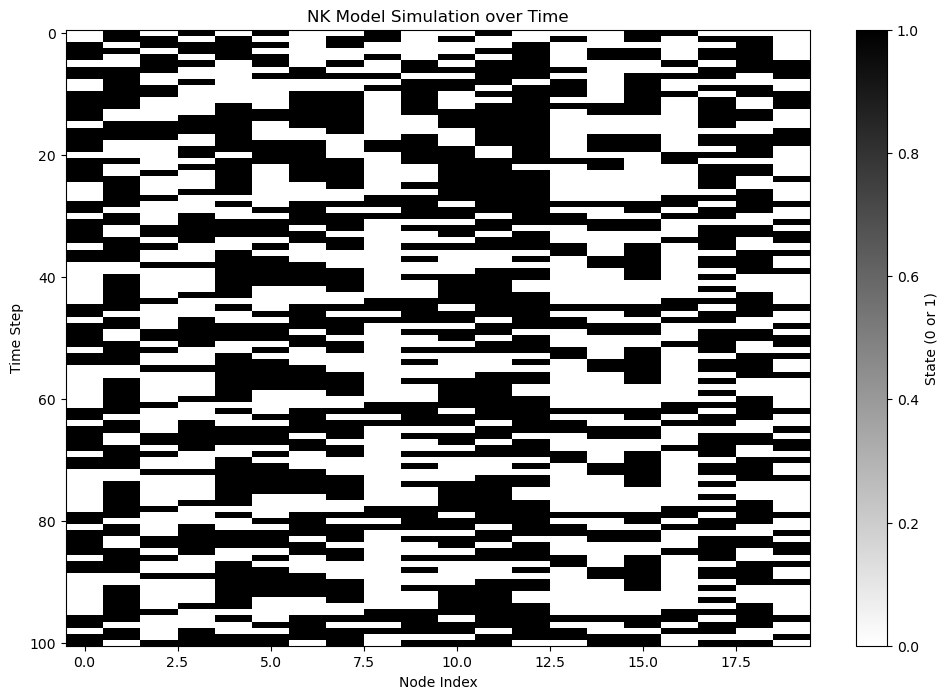

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

def generate_random_functions(N, K):
    """ Generate random Boolean functions for each node.
    Each function is represented as a dictionary mapping from input tuple to output (0 or 1).
    """
    functions = []
    for _ in range(N):
        # Generate all possible combinations of inputs K
        inputs = list(itertools.product([0, 1], repeat=K))
        # Assign a random output (0 or 1) to each input combination
        outputs = np.random.randint(2, size=(2**K,))
        function = {inp: out for inp, out in zip(inputs, outputs)}
        functions.append(function)
    return functions

def initialize_network(N, K):
    """ Initialize the network with random connections and random functions. """
    connections = [np.random.choice(N, K, replace=False) for _ in range(N)]
    functions = generate_random_functions(N, K)
    return connections, functions

def update_network(state, connections, functions):
    """ Update the network state based on the connections and Boolean functions. """
    new_state = np.zeros_like(state)
    for i in range(len(state)):
        inputs = tuple(state[connections[i]])
        new_state[i] = functions[i][inputs]
    return new_state

def simulate_network(N, K, steps):
    """ Simulate the network over a given number of steps. """
    # Initialize network
    connections, functions = initialize_network(N, K)
    # Random initial state
    state = np.random.randint(2, size=(N,))
    states = [state.copy()]
    
    # Update network state over time
    for _ in range(steps):
        state = update_network(state, connections, functions)
        states.append(state.copy())
    
    return states

# Parameters
N = 20  # number of nodes
K = 3   # number of inputs per node
steps = 100  # number of steps to simulate

# Simulate the network
states = simulate_network(N, K, steps)

# Plotting
plt.figure(figsize=(12, 8))
plt.imshow(states, cmap='binary', aspect='auto')
plt.title('NK Model Simulation over Time')
plt.xlabel('Node Index')
plt.ylabel('Time Step')
plt.colorbar(label='State (0 or 1)')
plt.show()


## increase k toward N to achieve chaotic states

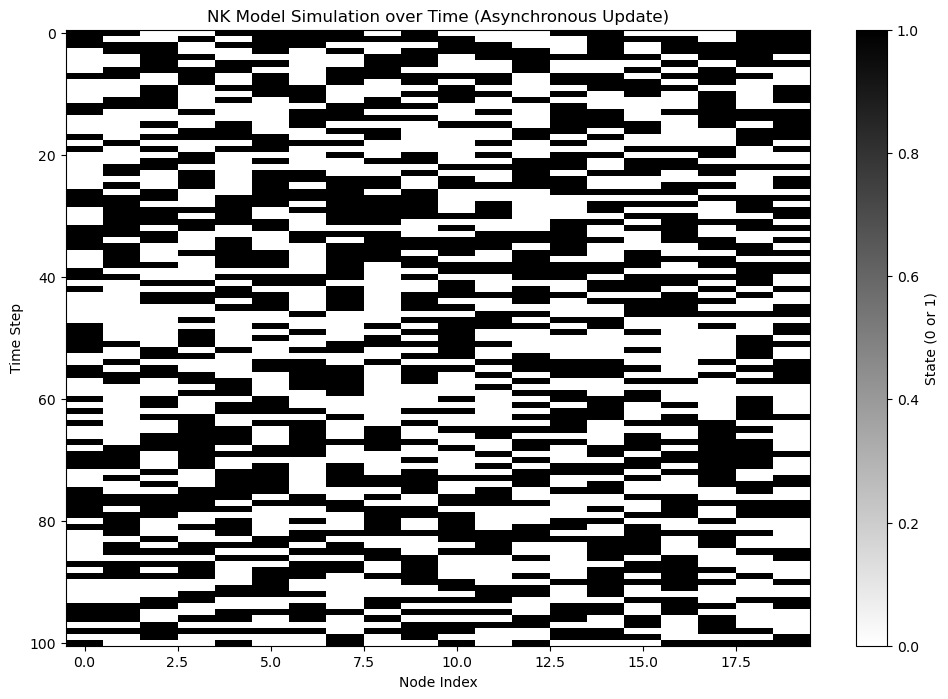

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

def generate_random_functions(N, K):
    """Generate random Boolean functions for each node."""
    functions = []
    for _ in range(N):
        inputs = list(itertools.product([0, 1], repeat=K))
        outputs = np.random.randint(2, size=(2**K,))
        function = {inp: out for inp, out in zip(inputs, outputs)}
        functions.append(function)
    return functions

def initialize_network(N, K):
    """Initialize the network with random connections and functions."""
    connections = [np.random.choice(N, K, replace=False) for _ in range(N)]
    functions = generate_random_functions(N, K)
    return connections, functions

def update_network_asynchronously(state, connections, functions):
    """Update the network state asynchronously."""
    new_state = state.copy()
    order = np.random.permutation(len(state))
    for i in order:
        inputs = tuple(new_state[connections[i]])
        new_state[i] = functions[i][inputs]
    return new_state

def simulate_network(N, K, steps):
    """Simulate the network over a specified number of steps."""
    connections, functions = initialize_network(N, K)
    state = np.random.randint(2, size=(N,))
    states = [state.copy()]
    
    for _ in range(steps):
        state = update_network_asynchronously(state, connections, functions)
        states.append(state.copy())
    
    return states

# Parameters for more chaotic behavior
N = 20  # number of nodes
K = int(N/2)  # half of the nodes as inputs, increases complexity
steps = 100  # number of simulation steps

# Simulate the network
states = simulate_network(N, K, steps)

# Plotting
plt.figure(figsize=(12, 8))
plt.imshow(states, cmap='binary', aspect='auto')
plt.title('NK Model Simulation over Time (Asynchronous Update)')
plt.xlabel('Node Index')
plt.ylabel('Time Step')
plt.colorbar(label='State (0 or 1)')
plt.show()


### Look for repetitions

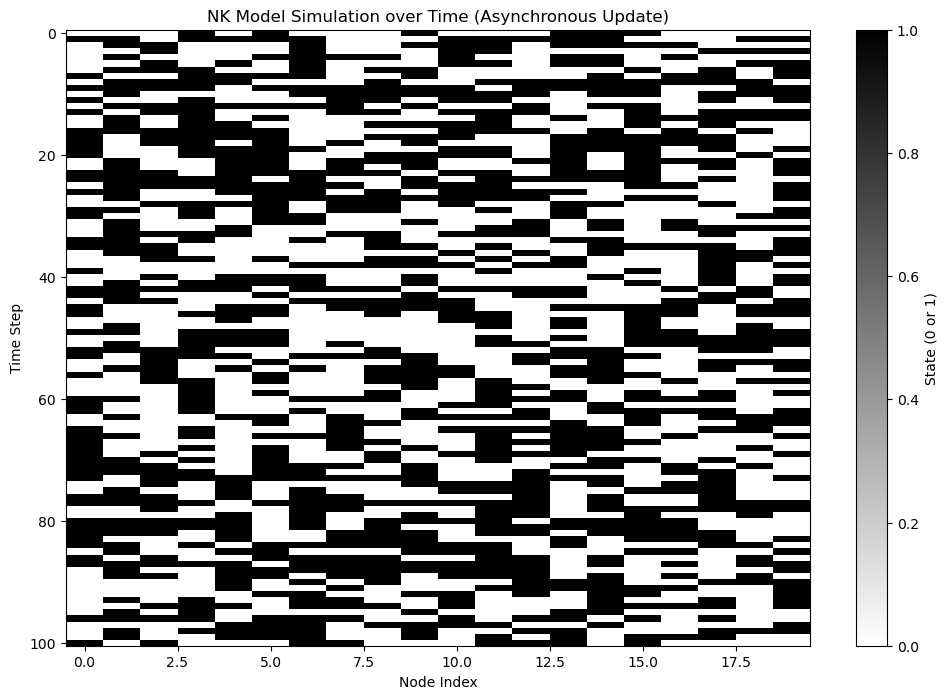

In [7]:
def simulate_network_with_repetition_detection(N, K, steps):
    connections, functions = initialize_network(N, K)
    state = np.random.randint(2, size=(N,))
    states = [state.copy()]
    state_history = set(tuple(state))
    
    for step in range(steps):
        state = update_network_asynchronously(state, connections, functions)
        state_tuple = tuple(state)
        if state_tuple in state_history:
            print(f"Repeating state detected at step {step + 1}")
            break
        state_history.add(state_tuple)
        states.append(state.copy())
    
    return states


# Parameters for more chaotic behavior
N = 20  # number of nodes
K = int(N/2)  # half of the nodes as inputs, increases complexity
steps = 100  # number of simulation steps

# Simulate the network
states = simulate_network_with_repetition_detection(N, K, steps)

# Plotting
plt.figure(figsize=(12, 8))
plt.imshow(states, cmap='binary', aspect='auto')
plt.title('NK Model Simulation over Time (Asynchronous Update)')
plt.xlabel('Node Index')
plt.ylabel('Time Step')
plt.colorbar(label='State (0 or 1)')
plt.show()


In [8]:
### convert network states to integers

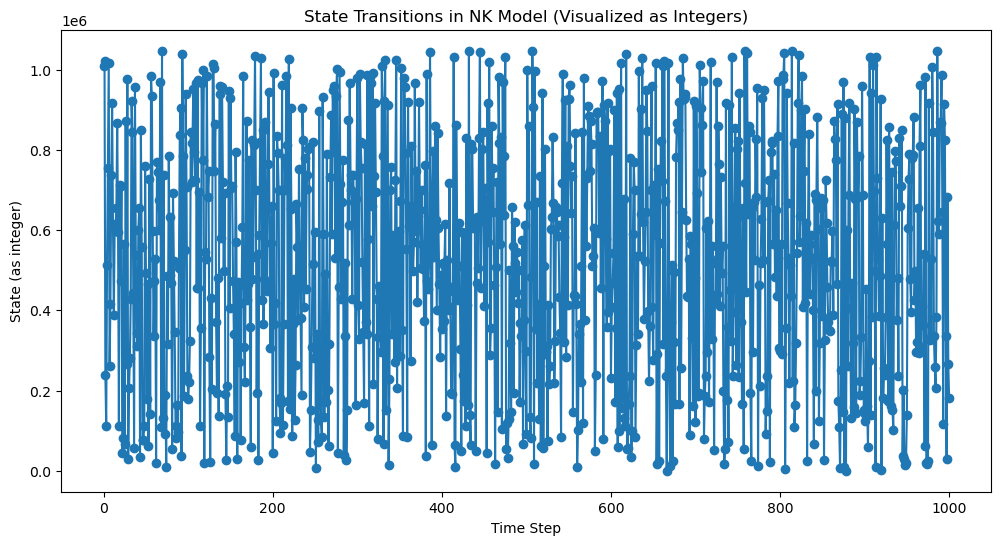

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

def generate_random_functions(N, K):
    """ Generate random Boolean functions for each node. """
    functions = []
    for _ in range(N):
        inputs = list(itertools.product([0, 1], repeat=K))
        outputs = np.random.randint(2, size=(2**K,))
        function = {inp: out for inp, out in zip(inputs, outputs)}
        functions.append(function)
    return functions

def initialize_network(N, K):
    """ Initialize the network with random connections and functions. """
    connections = [np.random.choice(N, K, replace=False) for _ in range(N)]
    functions = generate_random_functions(N, K)
    return connections, functions

def update_network_asynchronously(state, connections, functions):
    """ Update the network state asynchronously. """
    new_state = state.copy()
    order = np.random.permutation(len(state))
    for i in order:
        inputs = tuple(new_state[connections[i]])
        new_state[i] = functions[i][inputs]
    return new_state

def simulate_network(N, K, steps):
    """ Simulate the network over a specified number of steps. """
    connections, functions = initialize_network(N, K)
    state = np.random.randint(2, size=(N,))
    states = [state.copy()]
    state_values = [int(''.join(map(str, state)), 2)]  # convert binary state to integer

    for _ in range(steps):
        state = update_network_asynchronously(state, connections, functions)
        states.append(state.copy())
        state_values.append(int(''.join(map(str, state)), 2))
    
    return states, state_values

# Parameters for more chaotic behavior
N = 20  # number of nodes
K = int(N/2)  # half of the nodes as inputs, increases complexity
steps = 1000  # number of simulation steps

# Simulate the network
states, state_values = simulate_network(N, K, steps)

# Plotting the state transitions as integers
plt.figure(figsize=(12, 6))
plt.plot(state_values, marker='o', linestyle='-')
plt.title('State Transitions in NK Model (Visualized as Integers)')
plt.xlabel('Time Step')
plt.ylabel('State (as integer)')
plt.grid(False)  # Turn off the grid as per user preferences
plt.show()


### we can try to detect temporal patterns in the above

## instead, use Lyupanov exponents

Network Initialization: It sets up each node with random connections and Boolean functions.

Network Simulation: It evolves the network through a series of states, tracking these as both binary arrays and integer values.

Lyapunov Exponent Calculation: It calculates how quickly small differences in initial conditions grow, quantifying chaos.

Visualization: It plots the state transitions over time to visually assess dynamics and patterns.

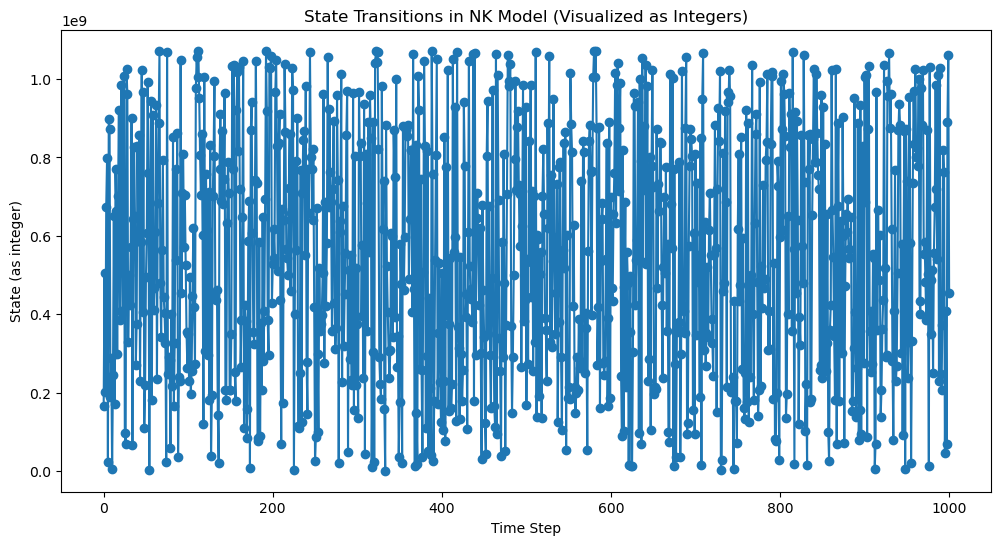

Calculated Lyapunov Exponent: 14.827


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

def generate_random_functions(N, K):
    """Generate random Boolean functions for each node."""
    functions = []
    for _ in range(N):
        inputs = list(itertools.product([0, 1], repeat=K))
        outputs = np.random.randint(2, size=(2**K,))
        function = {inp: out for inp, out in zip(inputs, outputs)}
        functions.append(function)
    return functions

def initialize_network(N, K):
    """Initialize the network with random connections and functions."""
    connections = [np.random.choice(N, K, replace=False) for _ in range(N)]
    functions = generate_random_functions(N, K)
    return connections, functions

def update_network_asynchronously(state, connections, functions):
    """Update the network state asynchronously."""
    new_state = state.copy()
    order = np.random.permutation(len(state))
    for i in order:
        inputs = tuple(new_state[connections[i]])
        new_state[i] = functions[i][inputs]
    return new_state

def simulate_network(N, K, steps):
    """Simulate the network over a specified number of steps."""
    connections, functions = initialize_network(N, K)
    state = np.random.randint(2, size=(N,))
    states = [state.copy()]
    state_values = [int(''.join(map(str, state)), 2)]  # convert binary state to integer

    for _ in range(steps):
        state = update_network_asynchronously(state, connections, functions)
        states.append(state.copy())
        state_values.append(int(''.join(map(str, state)), 2))
    
    return states, state_values

def calculate_lyapunov_exponent(N, K, steps, epsilon=1e-5):
    """Calculate the Lyapunov exponent for the network."""
    connections, functions = initialize_network(N, K)
    initial_state = np.random.randint(2, size=(N,))
    perturbed_state = initial_state.copy()
    perturbed_state[0] ^= 1  # flip the first bit to create a small perturbation
    
    divergence = 0
    for _ in range(steps):
        initial_state = update_network_asynchronously(initial_state, connections, functions)
        perturbed_state = update_network_asynchronously(perturbed_state, connections, functions)
        divergence += np.sum(np.abs(initial_state - perturbed_state))
    
    lyapunov_exponent = divergence / steps
    return lyapunov_exponent

# Parameters for simulation
N = 30  # number of nodes
K = int(N/2)  # half of the nodes as inputs, increases complexity
steps = 1000  # number of simulation steps

# Run simulation
states, state_values = simulate_network(N, K, steps)
lyapunov_exp = calculate_lyapunov_exponent(N, K, steps)

# Plotting the state transitions as integers
plt.figure(figsize=(12, 6))
plt.plot(state_values, marker='o', linestyle='-')
plt.title('State Transitions in NK Model (Visualized as Integers)')
plt.xlabel('Time Step')
plt.ylabel('State (as integer)')
plt.grid(False)
plt.show()

print(f"Calculated Lyapunov Exponent: {lyapunov_exp}")


### Use Fourier Analysis to detect repetitions

In [17]:
import numpy as np

def analyze_frequencies(state_values, sampling_rate=1):
    # Convert state values to a numpy array for FFT
    signal = np.array(state_values)
    fft_result = np.fft.fft(signal)
    frequencies = np.fft.fftfreq(signal.size, d=sampling_rate)
    
    # Plotting the spectrum
    plt.figure(figsize=(12, 6))
    plt.stem(frequencies, np.abs(fft_result), 'b', markerfmt=" ", basefmt="-b")
    plt.title('Frequency Spectrum of the State Transitions')
    plt.xlabel('Frequency')
    plt.ylabel('Amplitude')
    plt.show()


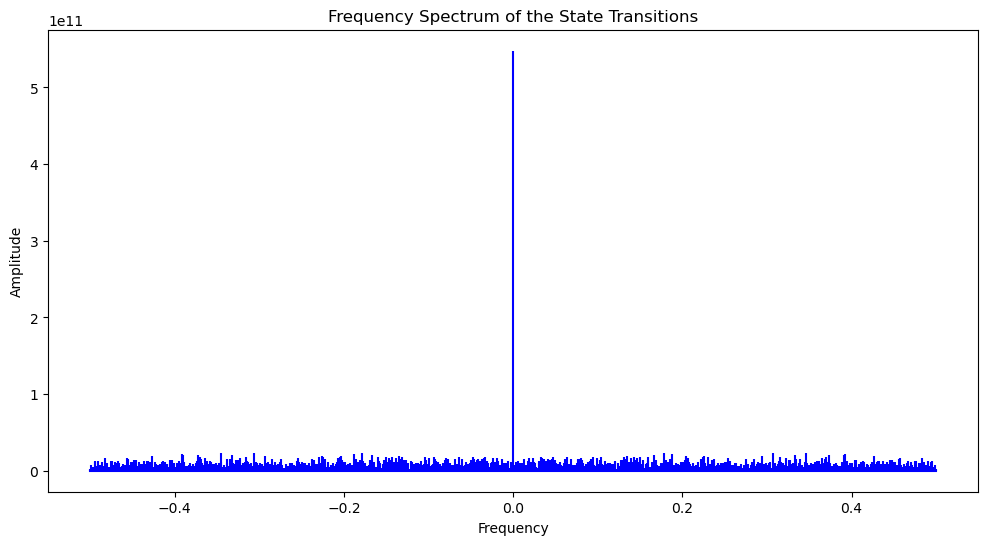

In [18]:
analyze_frequencies(state_values)

### instead use wavelet analysis

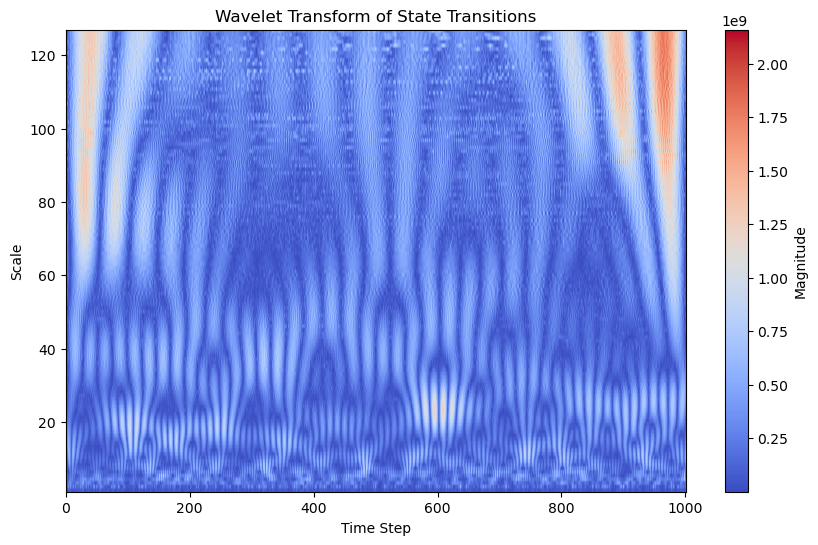

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

def wavelet_analysis(state_values):
    # Assuming state_values are converted into a signal format
    signal = np.array(state_values)
    scales = np.arange(1, 128)  # Define the range of scales you are interested in
    coef, freqs = pywt.cwt(signal, scales, 'morl', sampling_period=1)

    plt.figure(figsize=(10, 6))
    plt.imshow(np.abs(coef), extent=[0, len(signal), 1, max(scales)], cmap='coolwarm', aspect='auto', origin='lower')
    plt.title('Wavelet Transform of State Transitions')
    plt.xlabel('Time Step')
    plt.ylabel('Scale')
    plt.colorbar(label='Magnitude')
    plt.show()
    
    return(coef, freqs)

# Example usage:
# Assuming state_values is a list of integers representing the states over time
coef, freqs = wavelet_analysis(state_values)


### Wavelet Entropy:

Wavelet entropy measures the degree of order or disorder in the wavelet coefficients. Higher entropy values are associated with more chaotic or complex signals. The entropy is calculated by normalizing the wavelet energy distribution and computing its Shannon entropy.

In [20]:
def wavelet_entropy(coef):
    # Calculate the energy of the wavelet coefficients at each scale
    energy = np.sum(coef**2, axis=1)
    # Normalize the energy distribution
    energy_distribution = energy / np.sum(energy)
    # Calculate the Shannon entropy of the normalized energy distribution
    entropy = -np.sum(energy_distribution * np.log(energy_distribution))
    return entropy

wavelet_entropy(coef)

4.661221046966607

# Try to find the smallest possible network that has chaotic behavior

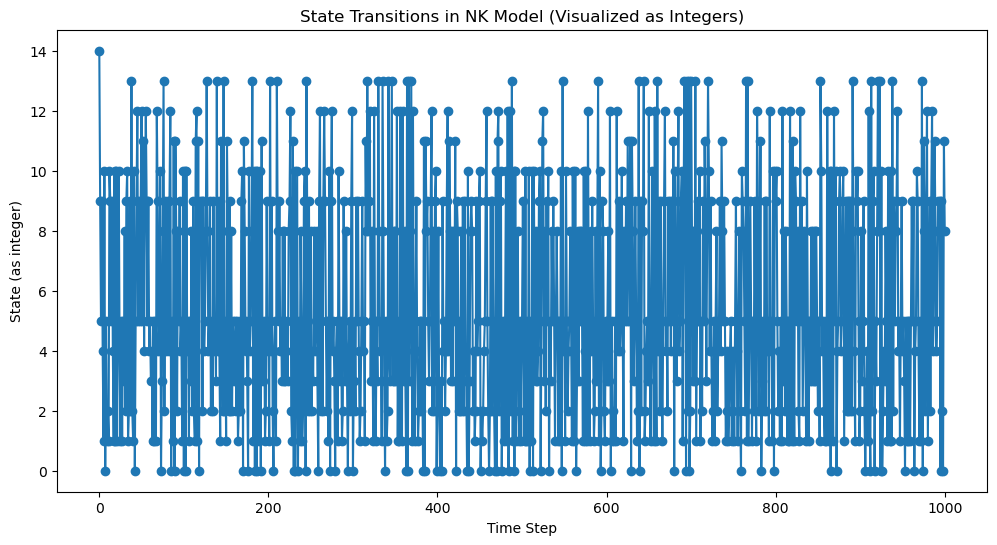

Calculated Lyapunov Exponent: 0.02


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

def generate_random_functions(N, K):
    """Generate random Boolean functions for each node."""
    functions = []
    for _ in range(N):
        inputs = list(itertools.product([0, 1], repeat=K))
        outputs = np.random.randint(2, size=(2**K,))
        function = {inp: out for inp, out in zip(inputs, outputs)}
        functions.append(function)
    return functions

def initialize_network(N, K):
    """Initialize the network with random connections and functions."""
    connections = [np.random.choice(N, K, replace=False) for _ in range(N)]
    functions = generate_random_functions(N, K)
    return connections, functions

def update_network_asynchronously(state, connections, functions):
    """Update the network state asynchronously."""
    new_state = state.copy()
    order = np.random.permutation(len(state))
    for i in order:
        inputs = tuple(new_state[connections[i]])
        new_state[i] = functions[i][inputs]
    return new_state

def simulate_network(N, K, steps):
    """Simulate the network over a specified number of steps."""
    connections, functions = initialize_network(N, K)
    state = np.random.randint(2, size=(N,))
    states = [state.copy()]
    state_values = [int(''.join(map(str, state)), 2)]  # convert binary state to integer

    for _ in range(steps):
        state = update_network_asynchronously(state, connections, functions)
        states.append(state.copy())
        state_values.append(int(''.join(map(str, state)), 2))
    
    return states, state_values

def calculate_lyapunov_exponent(N, K, steps, epsilon=1e-5):
    """Calculate the Lyapunov exponent for the network."""
    connections, functions = initialize_network(N, K)
    initial_state = np.random.randint(2, size=(N,))
    perturbed_state = initial_state.copy()
    perturbed_state[0] ^= 1  # flip the first bit to create a small perturbation
    
    divergence = 0
    for _ in range(steps):
        initial_state = update_network_asynchronously(initial_state, connections, functions)
        perturbed_state = update_network_asynchronously(perturbed_state, connections, functions)
        divergence += np.sum(np.abs(initial_state - perturbed_state))
    
    lyapunov_exponent = divergence / steps
    return lyapunov_exponent

# Parameters for simulation
N = 4  # number of nodes
K = 4  # half of the nodes as inputs, increases complexity
steps = 1000  # number of simulation steps

# Run simulation
states, state_values = simulate_network(N, K, steps)
lyapunov_exp = calculate_lyapunov_exponent(N, K, steps)

# Plotting the state transitions as integers
plt.figure(figsize=(12, 6))
plt.plot(state_values, marker='o', linestyle='-')
plt.title('State Transitions in NK Model (Visualized as Integers)')
plt.xlabel('Time Step')
plt.ylabel('State (as integer)')
plt.grid(False)
plt.show()

print(f"Calculated Lyapunov Exponent: {lyapunov_exp}")


# detect cycles

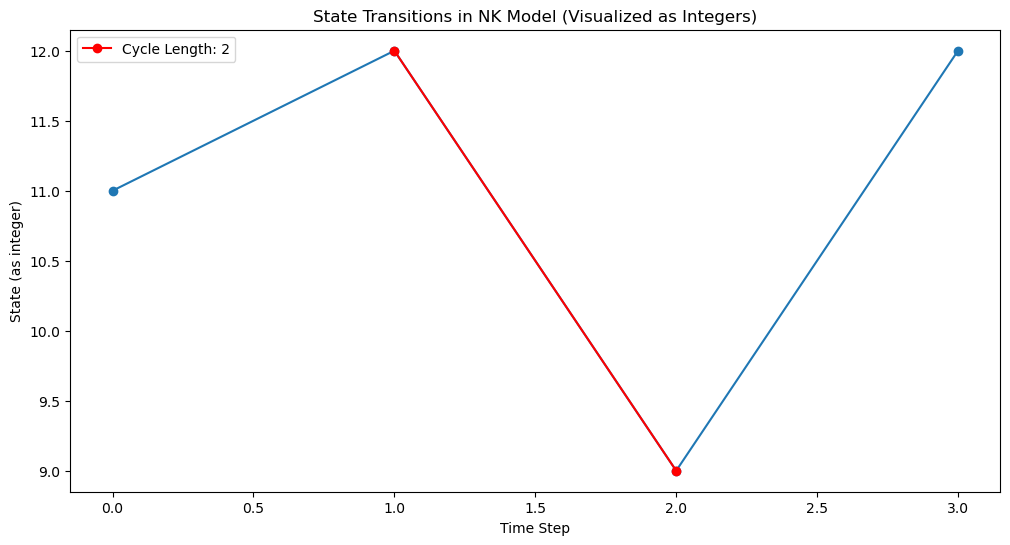

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

def generate_random_functions(N, K):
    """Generate random Boolean functions for each node."""
    functions = []
    for _ in range(N):
        inputs = list(itertools.product([0, 1], repeat=K))
        outputs = np.random.randint(2, size=(2**K,))
        function = {inp: out for inp, out in zip(inputs, outputs)}
        functions.append(function)
    return functions

def initialize_network(N, K):
    """Initialize the network with random connections and functions."""
    connections = [np.random.choice(N, K, replace=False) for _ in range(N)]
    functions = generate_random_functions(N, K)
    return connections, functions

def update_network_asynchronously(state, connections, functions):
    """Update the network state asynchronously."""
    new_state = state.copy()
    order = np.random.permutation(len(state))
    for i in order:
        inputs = tuple(new_state[connections[i]])
        new_state[i] = functions[i][inputs]
    return new_state

def simulate_network(N, K, steps):
    """Simulate the network over a specified number of steps."""
    connections, functions = initialize_network(N, K)
    state = np.random.randint(2, size=(N,))
    states = [state.copy()]
    state_values = [int(''.join(map(str, state)), 2)]  # convert binary state to integer
    cycle_length = None
    cycle_start = None

    for step in range(steps):
        state = update_network_asynchronously(state, connections, functions)
        state_int = int(''.join(map(str, state)), 2)
        states.append(state.copy())
        state_values.append(state_int)

        # Check for cycles
        if state_int in state_values[:-1]:
            cycle_start = state_values.index(state_int)
            cycle_length = step - cycle_start + 1
            break

    return states, state_values, cycle_start, cycle_length

# Parameters for simulation
N = 4  # Number of nodes
K = 4  # Number of inputs per node
steps = 1000  # Number of simulation steps

# Run simulation
states, state_values, cycle_start, cycle_length = simulate_network(N, K, steps)

# Plotting the state transitions as integers
plt.figure(figsize=(12, 6))
plt.plot(state_values, marker='o', linestyle='-')
plt.title('State Transitions in NK Model (Visualized as Integers)')
plt.xlabel('Time Step')
plt.ylabel('State (as integer)')
plt.grid(False)

# Highlight the cycle if found
if cycle_length is not None:
    cycle_states = state_values[cycle_start:cycle_start + cycle_length]
    cycle_steps = range(cycle_start, cycle_start + cycle_length)
    plt.plot(cycle_steps, cycle_states, 'r-o', label=f'Cycle Length: {cycle_length}')
    plt.legend()

plt.show()